In [1]:
import pandas as pd
import time
from scipy import stats
import numpy as np
import branca.colormap as cm
from folium.plugins import FloatImage


### Экспортируем данные о поездах желтого такси в Нью-Йорке за май 2016

In [2]:
data = pd.read_csv('yellow_tripdata_2016-05.csv', sep = ',')
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.00,0.3,17.80
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.00,0.3,9.68
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.00,0.3,9.36
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.00,0.3,21.96
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.00,0.3,8.76
5,2,2016-05-01 00:00:00,2016-05-01 00:05:19,2,0.63,-73.979294,40.755764,1,N,-73.988014,40.758469,1,5.0,0.5,0.5,0.00,0.00,0.3,6.30
6,2,2016-05-01 00:00:00,2016-05-01 00:15:43,1,6.68,-73.981544,40.780739,1,N,-73.937805,40.855343,1,20.5,0.5,0.5,2.00,0.00,0.3,23.80
7,2,2016-05-01 00:00:00,2016-05-01 00:06:31,1,1.48,-73.987198,40.750507,1,N,-73.980797,40.767826,1,7.0,0.5,0.5,1.66,0.00,0.3,9.96
8,2,2016-05-01 00:00:00,2016-05-01 00:00:00,4,1.59,-74.001610,40.740990,1,N,-73.981079,40.730675,1,8.0,0.5,0.5,0.00,0.00,0.3,9.30
9,2,2016-05-01 00:00:00,2016-05-01 00:00:00,3,3.52,-74.013855,40.714119,1,N,-73.994049,40.761452,2,13.0,0.5,0.5,0.00,0.00,0.3,14.30


## Удаляем все лишние данные

Убираем те, которые были начаты не в Нью-Йорке, в которых было 0 пассажиров, которые длились 0 секунды, в которых дистанция равна 0

In [3]:
data = data[(data['passenger_count'] != 0) & (data['pickup_longitude'] > -74.25559) & (data['pickup_longitude'] < -73.70001) &
          ( data['pickup_latitude'] > 40.49612) & (data['pickup_latitude'] < 40.91553) & 
           (data['tpep_pickup_datetime'] != data['tpep_dropoff_datetime'] )& (data['trip_distance'] != 0)]

## Преобразовываем время к нужному формату

Оставляем только час в который была совершена поездка

In [4]:
data['hour'] = data['tpep_pickup_datetime'].apply(lambda x: (int(x[8:10])-1)*24 + int(x[11:13]))

C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Производим разбивку на 2500 квадратов

In [5]:
dx = (74.25559 -73.70001)/50
dy =  (-40.49612 + 40.91553)/50
x = -74.25559
y = 40.49612
tab = {}
geo = {
    "type": "FeatureCollection",
  "features": []
}
x_edg = []
y_edg = [0]*51
for i in range(50):
    x1 = x
    x2 = x+dx
    x_edg.append(x)
    for j in range(50):
        y1 = y
        y2 = y+dy
        d = {
      "type": "Feature",
            "id": i*50 + j,
      "geometry": {
        "type": "Polygon", 
        "coordinates": [
          [
            [x1, y1], [x2, y1], [x2, y2], [x1,y2]
          ]
        ]
      } }
        geo['features'].append(d)
        y = y + dy
        y_edg[j+1] = y
    x = x + dx
    y = 40.49612

x_edg.append(x)
y_edg[0] = y

In [6]:
data['x'] = [1]*len(data)

C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Строим таблчку

Стоки таблицы - номер квадрата, столбец - час

In [7]:
%%time
statistic = stats.binned_statistic_2d(data['pickup_longitude'].values, 
                                      data['pickup_latitude'].values, 
                                      data['x'], 
                                      statistic='count', 
                                      bins=[x_edg, y_edg],
                                      expand_binnumbers=True)

Wall time: 4.36 s


In [8]:
data['region'] = (statistic.binnumber[0] - 1) * 50 + statistic.binnumber[1]

C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,hour,x,region
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,...,15.0,0.5,0.5,1.50,0.00,0.3,17.80,0,1,1233
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,...,7.5,0.5,0.5,0.88,0.00,0.3,9.68,0,1,1180
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,...,6.5,0.5,0.5,1.56,0.00,0.3,9.36,0,1,1180
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,...,17.0,0.5,0.5,3.66,0.00,0.3,21.96,0,1,1173
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,...,6.0,0.5,0.5,1.46,0.00,0.3,8.76,0,1,1130
5,2,2016-05-01 00:00:00,2016-05-01 00:05:19,2,0.63,-73.979294,40.755764,1,N,-73.988014,...,5.0,0.5,0.5,0.00,0.00,0.3,6.30,0,1,1231
6,2,2016-05-01 00:00:00,2016-05-01 00:15:43,1,6.68,-73.981544,40.780739,1,N,-73.937805,...,20.5,0.5,0.5,2.00,0.00,0.3,23.80,0,1,1234
7,2,2016-05-01 00:00:00,2016-05-01 00:06:31,1,1.48,-73.987198,40.750507,1,N,-73.980797,...,7.0,0.5,0.5,1.66,0.00,0.3,9.96,0,1,1231
11,1,2016-05-01 00:00:01,2016-05-01 00:15:50,1,5.20,-73.951302,40.774345,1,N,-74.002312,...,17.0,0.5,0.5,3.65,0.00,0.3,21.95,0,1,1384
12,2,2016-05-01 00:00:01,2016-05-01 00:13:28,5,4.75,-73.983498,40.726082,1,N,-74.014130,...,16.0,0.5,0.5,3.46,0.00,0.3,20.76,0,1,1228


In [10]:
table_0 = pd.pivot_table(data, values = 'x', index = ['region'], columns = ['hour'], fill_value = 0, aggfunc='count')

In [11]:
table_0.head()

hour,0,1,2,3,4,5,6,7,8,9,...,734,735,736,737,738,739,740,741,742,743
region,,,,,,,,,,,,,,,,,,,,,
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
h = data['hour'].max() + 1
table = np.zeros((2500, h))

for i in range(2500):
    if i in table_0.index:
        table[i] = table_0.loc[i]
        
ind = [str(i//24+1) + '.05 ' + str(i%24) + ':00' for i in range(h)]
table = pd.DataFrame(table, columns = ind)
table.head()

,1.05 0:00,1.05 1:00,1.05 2:00,1.05 3:00,1.05 4:00,1.05 5:00,1.05 6:00,1.05 7:00,1.05 8:00,1.05 9:00,...,31.05 14:00,31.05 15:00,31.05 16:00,31.05 17:00,31.05 18:00,31.05 19:00,31.05 20:00,31.05 21:00,31.05 22:00,31.05 23:00
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Empire State Building

Строим график зависимости числа поездок от часа в ячейке с Empire State Building

In [13]:
from matplotlib import pyplot as plt

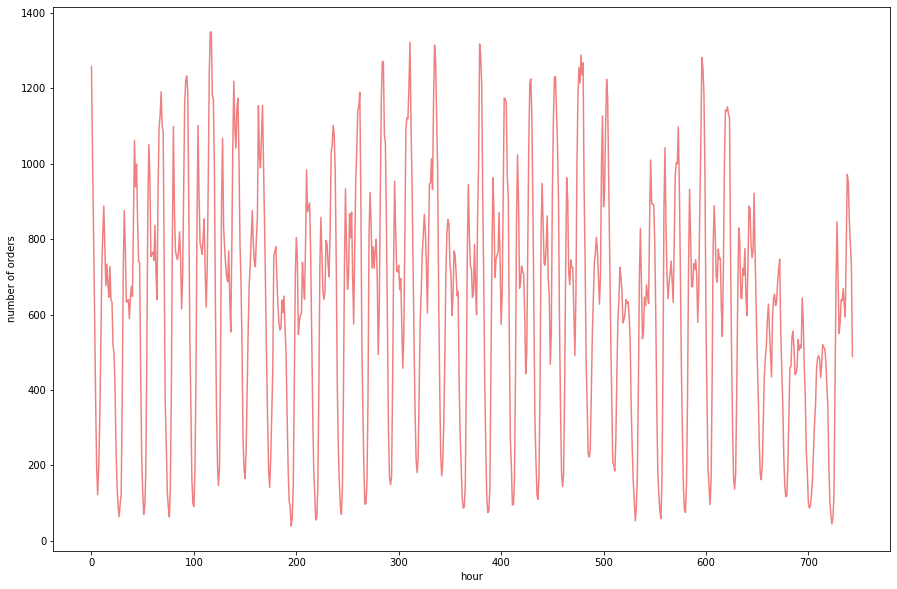

In [14]:
fig = plt.figure(figsize=(15,10))
plt.plot(list(range(744)), table.loc[1230], color = 'lightcoral')
plt.xlabel('hour')
plt.ylabel('number of orders')
plt.show()

## Посчитаем колличество пустых ячеек

In [15]:
table[table == 0].count().sum()

1718238

## Строим статистическую карту

Отмечаем на карте Empire State Building и Статую Свободы

In [16]:
import os
import folium

In [17]:
import json
import pandas as pd
import requests

In [18]:
arr1 = []
for i in range(2500):
    arr1.append(table.loc[i].sum())
    
arr = pd.DataFrame()
arr['num'] = arr1

print('Количество поездок из каждой зоны:')
arr

Количество поездок из каждой зоны:


,num
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [19]:
print('Количество ячеек из которых не было ни одной поездки:', arr1.count(0))

Количество ячеек из которых не было ни одной поездки: 1283


In [20]:
lan = (74.25559 + 73.70001)/2
lot =  (40.49612 + 40.91553)/2

In [21]:
dictt = arr['num']

In [22]:
arr['ind'] = list(range(2500))

In [23]:
m = folium.Map(location=[lot, -lan], zoom_start=10, max_zoom=12, min_zoom = 10)

folium.Choropleth(
    geo_data=geo,
    name='choropleth',
    data=arr,
    columns=['ind', 'num'],
    key_on='feature.id',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.1,
    legend_name='Number of trips',
    legend_size = 100, 
    bins = [0, 50, 100, 1000, 10000, 100000, 500000, 700000]
).add_to(m)

folium.Marker(
    location=[40.748391, -73.985543],
    popup='Empire State Building',
    weight=1,
).add_to(m)

folium.Marker(
    location=[40.689247, -74.044502],
    popup='Statue of liberty',
    weight=1,
).add_to(m)

folium.LayerControl().add_to(m)
m.save('map1.html')
m

## Посчитаем среднее количество

In [24]:
arr['mean'] = [arr['num'].loc[i]/744 for i in range(2500)]

In [25]:
m = folium.Map(location=[lot, -lan], zoom_start=10, max_zoom=12, min_zoom = 10)

folium.Choropleth(
    geo_data=geo,
    name='choropleth',
    data=arr,
    columns=['ind', 'mean'],
    key_on='feature.id',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.1,
    legend_name='Number of trips',
    bins = [0, 1, 2,3, 4, 5, 50, 100, 400, 900]
).add_to(m)

folium.Marker(
    location=[40.748391, -73.985543],
    popup='Empire State Building',
    weight=1,
).add_to(m)

folium.Marker(
    location=[40.689247, -74.044502],
    popup='Statue of liberty',
    weight=1,
).add_to(m)

folium.LayerControl().add_to(m)
m.save('map2.html')
m

In [26]:
arr0 = arr.loc[arr['mean'] > 5]
print('Количество ячеек, из которых совершается больше 5 поездок в час:', len(arr0))

Количество ячеек, из которых совершается больше 5 поездок в час: 102


### Строим на карте те ячейки, из которых совершается больше 5 поездок в час

In [27]:
lat = [geo['features'][1179]['geometry']['coordinates'][0][i][0] for i in range(4)]
lon = [geo['features'][1179]['geometry']['coordinates'][0][i][1] for i in range(4)]
d1 = sum(lat)/len(lat)
d2 = sum(lon)/len(lon)

In [28]:
m = folium.Map(location=[lot, -lan], zoom_start=10, max_zoom=12, min_zoom = 10)

folium.Choropleth(
    geo_data=geo,
    name='choropleth',
    data=arr0,
    columns=['ind', 'mean'],
    key_on='feature.id',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.1,
    legend_name='Number of trips',
    bins = [0, 50, 100, 1000]
).add_to(m)

folium.Marker(
    location=[40.748391, -73.985543],
    popup='Empire State Building',
    weight=1,
).add_to(m)

folium.Marker(
    location=[40.689247, -74.044502],
    popup='Statue of liberty',
    weight=1,
).add_to(m)

folium.Marker(
    location=[d2, d1],
    popup='popular',
    weight=1,
).add_to(m)

folium.LayerControl().add_to(m)
m.save('map3.html')
m

Как видно, среди ячеек нет таких, из которых поездки невозможны

### Создадим функцию, которая будет из данных за месяц строить сводную табличку

создаем таблички с января 2015 до июня 2016

In [72]:
def tabl(data, month, year):
    data = data[(data['passenger_count'] != 0) & (data['pickup_longitude'] > -74.25559) & (data['pickup_longitude'] < -73.70001) &
          ( data['pickup_latitude'] > 40.49612) & (data['pickup_latitude'] < 40.91553) & 
           (data['tpep_pickup_datetime'] != data['tpep_dropoff_datetime'] )& (data['trip_distance'] != 0)]
    
    data['hour'] = data['tpep_pickup_datetime'].apply(lambda x: (int(x[8:10])-1)*24 + int(x[11:13]))
    data['x'] = [1]*len(data)
    statistic = stats.binned_statistic_2d(data['pickup_longitude'].values, 
                                      data['pickup_latitude'].values, 
                                      data['x'], 
                                      statistic='count', 
                                      bins=[x_edg, y_edg],
                                      expand_binnumbers=True)
    
    data['region'] = (statistic.binnumber[0] - 1) * 50 + statistic.binnumber[1]
    
    table_0 = pd.pivot_table(data, values = 'x', index = ['region'], columns = ['hour'], fill_value = 0, aggfunc='count')
    h = data['hour'].max() + 1
    table = np.zeros((2500, h))

    for i in range(2500):
        if i in table_0.index:
            table[i] = table_0.loc[i]
        
    ind = [str(year) + '.' + str(month).rjust(2, '0') + '.' + str(i//24+1).rjust(2, '0') + ' ' + str(i%24).rjust(2, '0') + ':00' for i in range(h)]
    table = pd.DataFrame(table, columns = ind)
    return table 

In [73]:
data = pd.read_csv('yellow_tripdata_2016-01.csv', sep = ',')
tabl(data, 1, 2016).to_csv('tabl_01_2016.csv', sep = ';', index = False)

C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm

In [77]:
data = pd.read_csv('yellow_tripdata_2016-02.csv', sep = ',')
tabl(data, 2, 2016).to_csv('tabl_02_2016.csv', sep = ';', index = False)

C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm

In [78]:
data = pd.read_csv('yellow_tripdata_2016-03.csv', sep = ',')
tabl(data, 3, 2016).to_csv('tabl_03_2016.csv', sep = ';', index = False)

C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm

In [79]:
data = pd.read_csv('yellow_tripdata_2016-04.csv', sep = ',')
tabl(data, 4, 2016).to_csv('tabl_04_2016.csv', sep = ';', index = False)

C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm

In [80]:
data = pd.read_csv('yellow_tripdata_2016-05.csv', sep = ',')
tabl(data, 5, 2016).to_csv('tabl_05_2016.csv', sep = ';', index = False)

C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm

In [81]:
data = pd.read_csv('yellow_tripdata_2016-06.csv', sep = ',')
tabl(data, 6, 2016).to_csv('tabl_06_2016.csv', sep = ';', index = False)

C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm

In [82]:
data = pd.read_csv('yellow_tripdata_2015-01.csv', sep = ',')
tabl(data, 1, 2015).to_csv('tabl_01_2015.csv', sep = ';', index = False)

C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm

In [83]:
data = pd.read_csv('yellow_tripdata_2015-02.csv', sep = ',')
tabl(data, 2, 2015).to_csv('tabl_02_2015.csv', sep = ';', index = False)

C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm

In [84]:
data = pd.read_csv('yellow_tripdata_2015-03.csv', sep = ',')
tabl(data, 3, 2015).to_csv('tabl_03_2015.csv', sep = ';', index = False)

C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm

In [85]:
data = pd.read_csv('yellow_tripdata_2015-04.csv', sep = ',')
tabl(data, 4, 2015).to_csv('tabl_04_2015.csv', sep = ';', index = False)

C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm

In [86]:
data = pd.read_csv('yellow_tripdata_2015-05.csv', sep = ',')
tabl(data, 5, 2015).to_csv('tabl_05_2015.csv', sep = ';', index = False)

C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm

In [87]:
data = pd.read_csv('yellow_tripdata_2015-06.csv', sep = ',')
tabl(data, 6, 2015).to_csv('tabl_06_2015.csv', sep = ';', index = False)

C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm

In [88]:
data = pd.read_csv('yellow_tripdata_2015-07.csv', sep = ',')
tabl(data, 7, 2015).to_csv('tabl_07_2015.csv', sep = ';', index = False)

C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm

In [89]:
data = pd.read_csv('yellow_tripdata_2015-08.csv', sep = ',')
tabl(data, 8, 2015).to_csv('tabl_08_2015.csv', sep = ';', index = False)

C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm

In [90]:
data = pd.read_csv('yellow_tripdata_2015-09.csv', sep = ',')
tabl(data, 9, 2015).to_csv('tabl_09_2015.csv', sep = ';', index = False)

C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm

In [91]:
data = pd.read_csv('yellow_tripdata_2015-10.csv', sep = ',')
tabl(data, 10, 2015).to_csv('tabl_10_2015.csv', sep = ';', index = False)

C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm

In [92]:
data = pd.read_csv('yellow_tripdata_2015-11.csv', sep = ',')
tabl(data, 11, 2015).to_csv('tabl_11_2015.csv', sep = ';', index = False)

C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm

In [93]:
data = pd.read_csv('yellow_tripdata_2015-12.csv', sep = ',')
tabl(data, 12, 2015).to_csv('tabl_12_2015.csv', sep = ';', index = False)

C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\ada\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm